In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [352]:
def layer_2_model(F, alpha):
    '''
    Functions to calculate the 2-layer model
    
    Parameters
    ----------
    F : array or list
        Input vector from which to get the value of the forcings
    alpha : float (optional)
        Number defining the alpha of the equation
        
    Returns
    -------
    array, array
        Output Dataframe containing new computed
        forcing values for upper and deep layers
    '''

    # Creating empty arrays of length F
    T_u, T_d = np.zeros(len(F)), np.zeros(len(F))

    # Iterating through each value of T_u and T_d and update it
    for i in range(1, len(T_u)):
        T_u[i] = T_d[i-1] + ((F[i-1]- alpha * T_d[i-1] - (gamma * (T_d[i-1] - T_d[i-1])) / C_u)) * dt
        T_d[i] = T_d[i-1] + ((gamma * (T_u[i-1] - T_d[i-1])) / C_d ) * dt
    return T_u, T_d


def calculate_T_dataframe(df, alpha=1.16):
    '''
    Function to compute the 2-layer model for
    each of the columns in the input DataFrame
       
    Parameters
    ----------
    df : pandas.DataFrame
        Input dataframe of loaded forcing values
    alpha : float (optional)
        Number defining the alpha of the equation
        
    Returns
    -------
    pandas.DataFrame
        Output Dataframe containing new computed
        forcing values  
    '''
    
    # Creating an empty dataframe to store the new computed vectors
    # for each of the columns in the input dataframe
    df1 = pd.DataFrame()
    
    # Iterating through the input dataframe and compute the 2-layers model
    for i, j in enumerate(df.columns):
        T_u, T_d = layer_2_model(df[[j]].values, alpha)
        
        # New dataframe to iteratively store each new computer vector
        T_u_df = pd.DataFrame({j: T_u.tolist()}, index= df[[j]].index)
        
        # Appending the new dataframe to 'storing' dataframe 
        df1 = df1.append(T_u_df.T)

    return df1.T


def plot_dataframes(old_df, new_df):
    '''
    Function to plot the original and the computed values
    thourgh the 2-layers model and their differences
    
    Parameters
    ----------
    old_df : pandas.DataFrame
        Original values
    new_df : pandas.DataFrame
        Newly computed values
    '''

    # Setting up plotting space
    fig, ax = plt.subplots(4, 4, figsize=(20, 16))
    fig.tight_layout(h_pad = 4, w_pad=2)

    # Setting initial column and row plot position
    row = 0
    col = 0

    # Iterate through teh columns of the input df
    for i, j in enumerate(new_df.columns):

        # Calculate the difference between old and new vals
        diff = old_df[[j]] - new_df[[j]]

        # Changing row and col values when the index is out of bounds
        if (i != 0) & (i % 4 == 0):
            row += 1
            col = 0

        # Plotting
        ax[row, col].plot(old_df[[j]])
        ax[row, col].plot(new_df[[j]])
        ax[row, col].plot(diff)
        ax[row, col].set_title(j).set_size(16)
        ax[row, col].legend(labels=['Old Vals', 'New Vals', 'Diff'], loc='best')
        col += 1

    # Setting the unused Axis off
    ax[3, 2].axis('off')
    ax[3, 3].axis('off')

    return

In [56]:
# Loading CSV files and convert the column 'year' to an index
ssp119 = pd.read_csv('ssp_erf-master/SSPs/ERF_ssp119_1750-2500.csv', index_col=['year'])
ssp126 = pd.read_csv('ssp_erf-master/SSPs/ERF_ssp126_1750-2500.csv', index_col=['year'])
ssp245 = pd.read_csv('ssp_erf-master/SSPs/ERF_ssp245_1750-2500.csv', index_col=['year'])
ssp370 = pd.read_csv('ssp_erf-master/SSPs/ERF_ssp370_1750-2500.csv', index_col=['year'])
# ssp370_low = pd.read_csv('ssp_erf-master/SSPs/ERF_ssp370-lowNTCF_1750-2500.csv', index_col=['year']) ##This does not load
ssp370_low_aer = pd.read_csv('ssp_erf-master/SSPs/ERF_ssp370-lowNTCF-aerchemmip_1750-2500.csv', index_col=['year'])
ssp370_low_gid = pd.read_csv('ssp_erf-master/SSPs/ERF_ssp370-lowNTCF-gidden_1750-2500.csv', index_col=['year'])
ssp434 = pd.read_csv('ssp_erf-master/SSPs/ERF_ssp434_1750-2500.csv', index_col=['year'])
ssp460 = pd.read_csv('ssp_erf-master/SSPs/ERF_ssp460_1750-2500.csv', index_col=['year'])
ssp534 = pd.read_csv('ssp_erf-master/SSPs/ERF_ssp534-over_1750-2500.csv', index_col=['year'])
ssp585 = pd.read_csv('ssp_erf-master/SSPs/ERF_ssp585_1750-2500.csv', index_col=['year'])

In [143]:
# Sea Water Density (kg/m3)
rho = 1027.

# Specific Heat Capacity of Water (J/kg/K)
c_p = 4218.

# Depth of Upper Layer
h_u = 100.

# Depth of Deep Layer
h_d = 900.

# Vertical Diffusity
k = 1.

# Time step
dt = 1.

# Thermal Inertia Upper Layer
C_u = rho * c_p * h_u

# Thermal Inertia Deep Layer
C_d = rho * c_p * h_d

# Heat Diffusing Down Into Deep Ocean
gamma = (2 * k * c_p * rho) / (h_u + h_d)

In [338]:
# Computing the 2-layer model for each column in each of the loaded files
ssp119_new = calculate_T_dataframe(ssp119.loc[:, 'co2':'solar'])
ssp126_new = calculate_T_dataframe(ssp126.loc[:, 'co2':'solar'])
ssp245_new = calculate_T_dataframe(ssp245.loc[:, 'co2':'solar'])
ssp370_new = calculate_T_dataframe(ssp370.loc[:, 'co2':'solar'])
ssp370_low_aernew = calculate_T_dataframe(ssp370_low_aer.loc[:, 'co2':'solar'])
ssp370_low_gidnew = calculate_T_dataframe(ssp370_low_gid.loc[:, 'co2':'solar'])
ssp434_new = calculate_T_dataframe(ssp434.loc[:, 'co2':'solar'])
ssp460_new = calculate_T_dataframe(ssp460.loc[:, 'co2':'solar'])
ssp534_new = calculate_T_dataframe(ssp534.loc[:, 'co2':'solar'])
ssp585_new = calculate_T_dataframe(ssp585.loc[:, 'co2':'solar'])

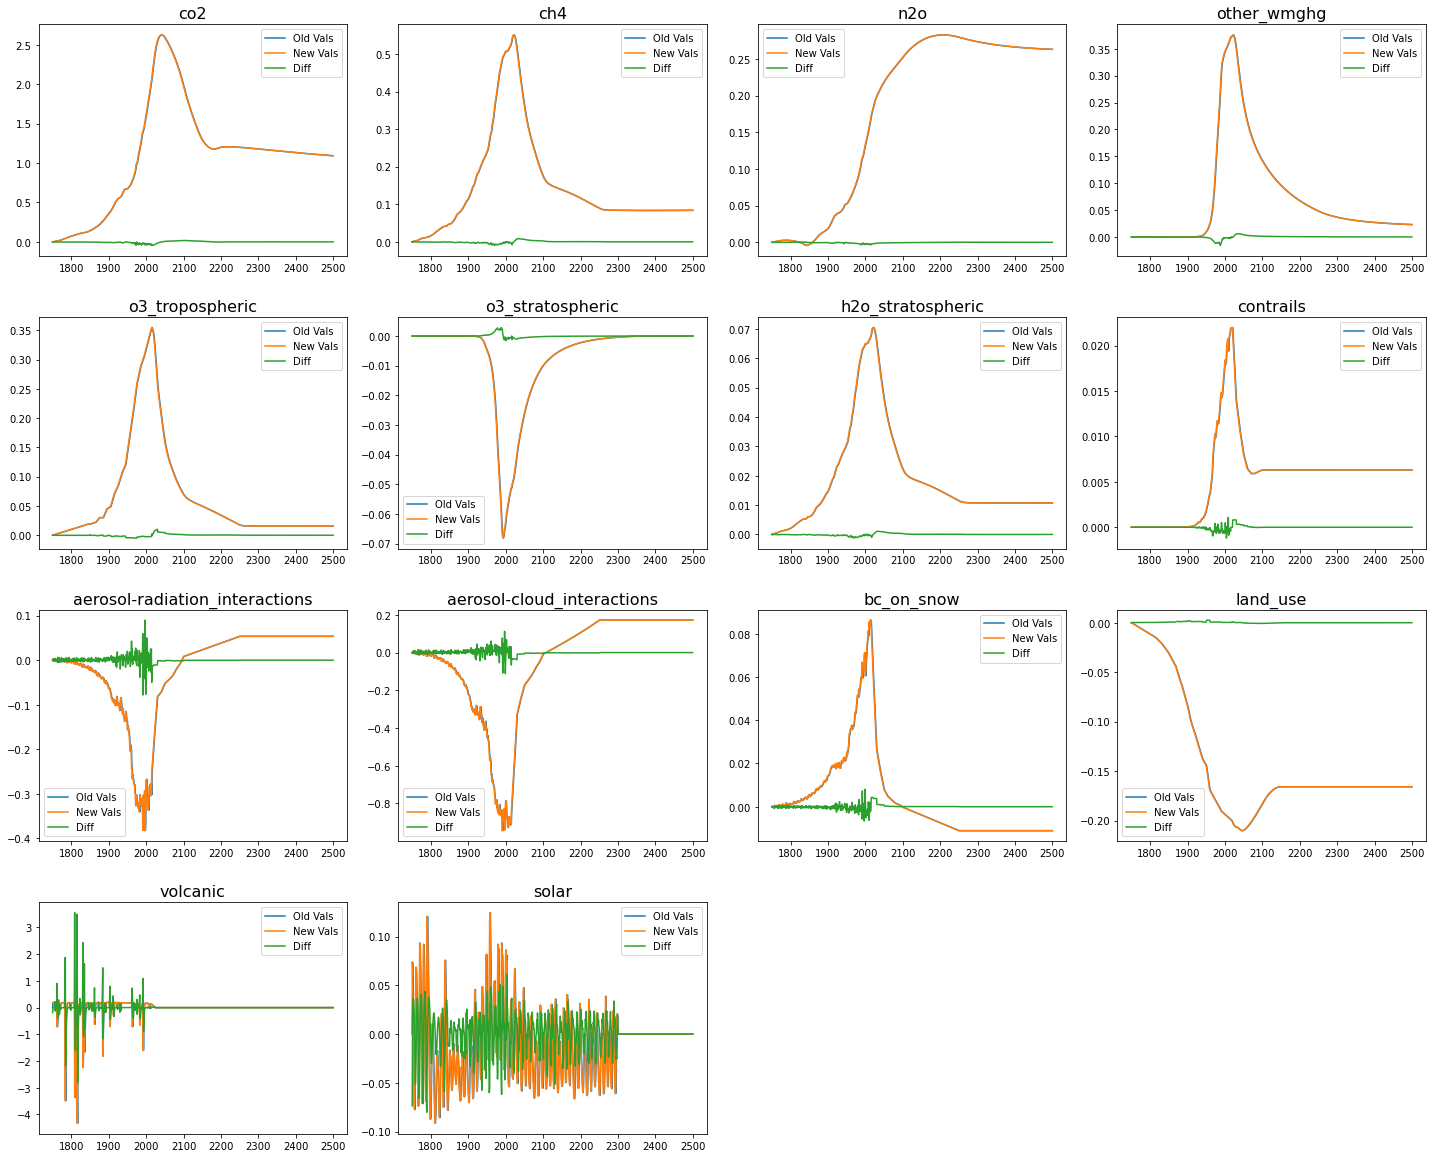

In [353]:
plot_dataframes(ssp119_new, ssp119.loc[:, 'co2':'solar'])

You can then plot the rest of the dataframes

In [355]:
# Putting all the new dataframes in a list
new_dataframes = [ssp119_new, ssp126_new, ssp245_new, ssp370_new,
                  ssp370_low_aernew, ssp370_low_gidnew, ssp434_new,
                  ssp460_new, ssp534_new, ssp585_new]

# creating a list of empty dataframes
same_cols_aggregates = [pd.DataFrame() for i in a[0].columns]

# looping through the new_dataframes and appending each column to a
# different dataframe in 'same_cols_aggregates' for ploting purposes
for df in new_dataframes:
    for i, j in enumerate(df.columns):
        same_cols_aggregates[i] = same_cols_aggregates[i].append(df[[j]].T)

(0.0, 1.0, 0.0, 1.0)

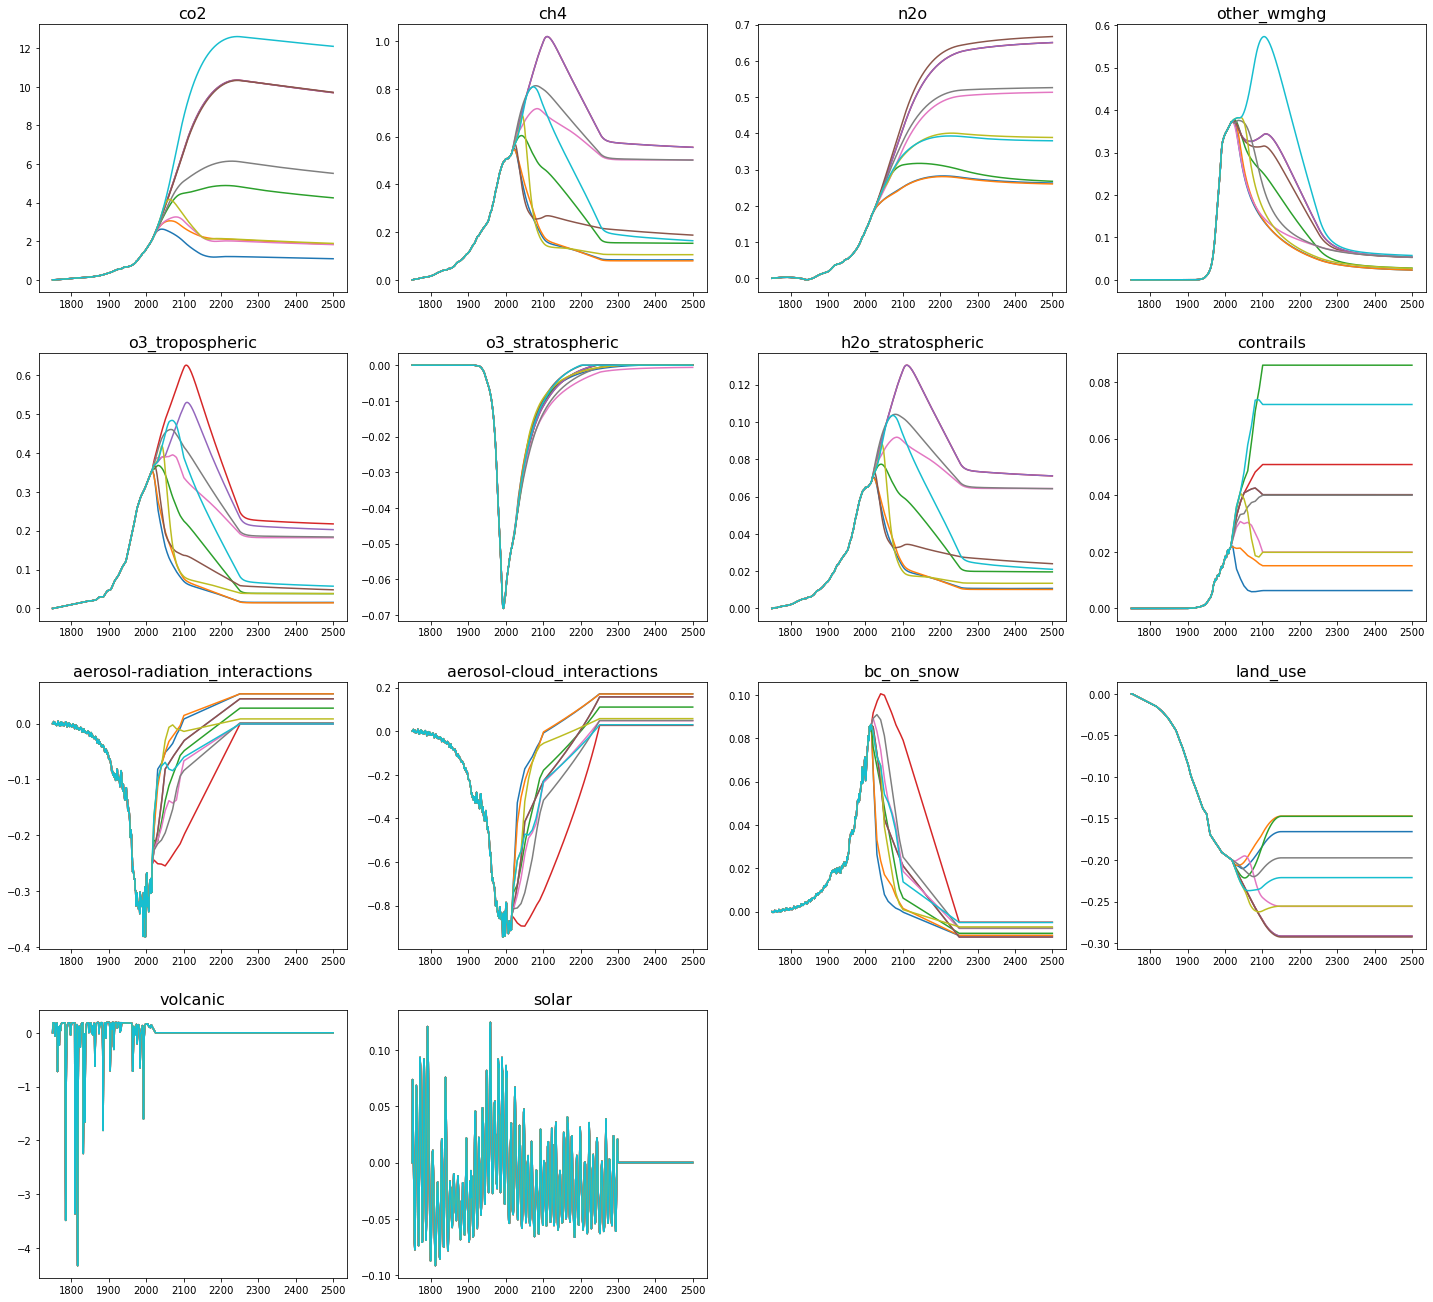

In [356]:
# Setting up plotting space
fig, ax = plt.subplots(4, 4, figsize=(20, 18))
fig.tight_layout(h_pad = 4, w_pad=2)

# Setting initial column and row plot position
row = 0
col = 0

# Iterate through teh columns of the input df
for i, df in enumerate(b):

    # Changing row and col values when the index is out of bounds
    if (i != 0) & (i % 4 == 0):
        row += 1
        col = 0
    
    # Plotting
    ax[row, col].plot(df.T)
    ax[row, col].set_title(df.T.columns[0]).set_size(16)
#         ax[row, col].legend(labels=['Old Vals', 'New Vals', 'Diff'], loc='best')
    col += 1

# Setting the unused Axis off
ax[3, 2].axis('off')
ax[3, 3].axis('off')